### Homework 3 (Question 5)

For this question, you will write functions for finding the principal components of an image dataset and reduce the  dimensionality of the images to 2 so they can be displayed on a 2-dimensional scatter plot. Note that you must write your own function to perform the principal component analysis and avoid using the built-in functions provided by scikit-learn and scipy libraries. If you're unsure whether you can use some function, please email the instructor.

**Step 1:** First, you need to download the digits.zip file from homework 3 folder on D2L. Unzip the file into the working directory of your python program. There are 20 images in the extracted directory called digits; 10 of them belongs to images of handwritten digit 1 and the remaining 10 belongs to images of handwritten digit 2. Next, use the example shown in step 20 (In [20]:) from tutorial 4 on Data Preprocessing (http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial4/tutorial4.html) to write the code to load the images and store them into a numpy array object named *imgData*. Note that each image is of size 28 x 28 pixels = 784, and thus, must be stored as a 784-dimensional array.

You should use the functions provided in matplotlib.pyplot and matplotlib.image libraries to perform this step. Use imread() function to load the images into the 2-dimensional numpy array object (*imgData*), imshow() to display the image, and flatten() to reshape the 2-dimensional image into a 1-dimensional image.

Dimension of imgData : (20, 784)


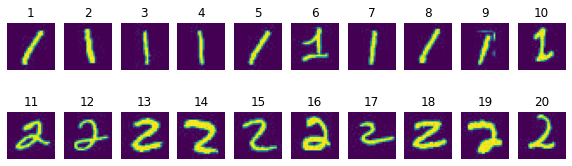

In [209]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
numImages = 20
fig = plt.figure(figsize=(10,3))
imgData = np.zeros(shape=(numImages,784))

for i in range(1,numImages+1):
    if i<=10: filename = 'digits/digit1_'+str(i)+'.jpg'
    else: filename = 'digits/digit2_'+str(i-10)+'.jpg'
    img = mpimg.imread(filename)
    ax = fig.add_subplot(2,10,i)
    plt.imshow(img)
    plt.axis('off')
    ax.set_title(str(i))
    imgData[i-1] = np.array(img.flatten()).reshape(1,img.shape[0]*img.shape[1])
    
    
    
print('Dimension of imgData :', imgData.shape)

**Step 2.** Principal component analysis (PCA) is a classic dimensionality reduction method to reduce the number of features (columns) associated with the image dataset. To apply PCA, you must first compute the covariance matrix of the data. A covariance matrix is very similar to correlation matrix (see the programming question in homework 1) except you do not have to standardize the data by dividing it with standard deviations. 

For this step, create a matrix (i.e., 2-dimensional array) $C$ that contains the covariance between every pair of columns in the data. The covariance between a pair of column vectors, $\mathbf{u}$ and $\mathbf{v}$, is defined as:
$$C_{uv} = \frac{1}{N-1} \sum_{k=1}^N (u_{k} - \mu_u)(v_{k} - \mu_v) = \frac{1}{N-1} \sum_{k=1}^N r_{ku}r_{kv} = \frac{1}{N-1} (\mathbf{R}^T\mathbf{R})_{uv},$$
where $\mathbf{r}_u = \mathbf{u} - \mu_u$ is the centered vector for $\mathbf{u}$, $r_{ku}$ is the k-th element of $\mathbf{r}_u$, $r_{kv}$ is the k-th element of $\mathbf{r}_v$, $\mu_u$ is the mean of vector $\mathbf{u}$, and $\mu_v$ is the mean of vector $\mathbf{v}$. 

**(a)** Write the function to center each column of its input matrix. Centering the columns of a matrix means subtracting each entry in the matrix by its column mean (average). You should write your own code to compute the mean value instead of using numpy's built-in mean() function. You may use numpy.add() and np.reduce() for this step.

In [210]:
def centering(matrix):
    
    col_means = np.zeros(matrix.shape[1])
    for col_number in range (matrix.shape[1]):
        col_means[col_number] = sum(matrix[:,col_number])/len(matrix[:,col_number])
    centering_matrix = matrix - col_means
    return centering_matrix

# Code to test correctness of the centering function()

print('Test correctness of centering function:')
A = np.array([[1,2,3,4],[2,4,6,8],[3,6,9,12]])
print('Input matrix:')
print(A)
print('Centered matrix:')
print(centering(A))

Test correctness of centering function:
Input matrix:
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]]
Centered matrix:
[[-1. -2. -3. -4.]
 [ 0.  0.  0.  0.]
 [ 1.  2.  3.  4.]]


**(b)** Write the function to compute the covariance matrix of an input matrix. The function will first center the columns of the input matrix using the centering() function and then compute the dot product between the transpose of the centered_matrix and the centered_matrix, divided by the number of rows -1:
$$\textrm{Covariance matrix,} \ \mathbf{C} = \frac{1}{N-1}\mathbf{R}^T \mathbf{R}$$ 


In [211]:
def covariance(matrix):
    R = centering(matrix)
    R_t = np.transpose(R)
    cov = R_t.dot(R)/(R.shape[0]-1)
    return cov

print('Test correctness of covariance matrix:')
A = np.array([[1,2,3,4],[2,4,6,8],[3,6,9,12]])
print('Input matrix:')
print(A)
print('Covariance matrix:')
print(covariance(A))
print('Covariance matrix (numpy results):')
print(np.cov(A.T))    # Note: numpy cov() function applies covariance on the rows instead of the columns

Test correctness of covariance matrix:
Input matrix:
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]]
Covariance matrix:
[[ 1.  2.  3.  4.]
 [ 2.  4.  6.  8.]
 [ 3.  6.  9. 12.]
 [ 4.  8. 12. 16.]]
Covariance matrix (numpy results):
[[ 1.  2.  3.  4.]
 [ 2.  4.  6.  8.]
 [ 3.  6.  9. 12.]
 [ 4.  8. 12. 16.]]


**Step 3:** For this step, you will compute the first 2 principal components of *imgData*. To do this, you need to write the functions for finding the top-2 eigenvectors of the covariance matrix and then project each row vector (each image) into a 2-dimensional vector.

**(a)** Write a function to find the principal eigenvector of a square matrix using power method. The function power_method() takes three parameters as its input: the square matrix, the initial guess ($\mathbf{x}_0$), maximum number of iterations. It wil See lecture 8 for more information. It will then return the principal eigenvector computed iteratively as follows:
$$\mathbf{x}_k = \frac{\mathbf{A}\mathbf{x}_{k-1}}{\|\mathbf{Ax}_{k-1}\|_2}$$
You should write your own implementation for vector norm. You can use np.sqrt() and np.add.reduce() to implement the vector 2-norm (in only 1 line of code):
$$\|\mathbf{y}\|_2 = \sqrt{\sum_i y_i^2}$$

In [212]:
def power_method(matrix, x0, maxiter):
    result = x0
    for i in range(maxiter):
        result = matrix.dot(result)
        result = result/np.sqrt(np.add.reduce(result*result))
    return result
    

print('Test correctness of power method:')
A = np.array([[5,-2,2],[-2,8,-2],[2,-2,4]])
print(A)
print('Principal eigenvector:')
print(power_method(A, np.ones((A.shape[0],1)), 100))

Test correctness of power method:
[[ 5 -2  2]
 [-2  8 -2]
 [ 2 -2  4]]
Principal eigenvector:
[[ 0.46046882]
 [-0.79029325]
 [ 0.40423391]]


**(b)** Next, write a function to find the top-k eigenvectors of a square matrix. The function should call the power method to return a new principal eigenvector after subtracting the rank-1 matrices obtained from its previous iterations. The eigenvector corresponding to the k-th largest (absolute) eigenvector of an input matrix $\mathbf{A}$ is obtained by applying power method to the following matrix:
$$\mathbf{A} - \sum_{i=1}^{k-1} \lambda_i \mathbf{x}_i \mathbf{x}_i^T,$$
where $(\lambda_i, \mathbf{x}_i)$ is the eigenpair (i.e., eigenvalue and eigenvector pair) associated with the i-th largest (absolute) eigenvalue. For example, to find the eigenpairs associated with the top-k largest (absolute) eigenvalues of $\mathbf{A}$, apply the following steps:

- Set $\mathbf{A}_1 = \mathbf{A}$
- Apply power method to $\mathbf{A}_1$ to obtain $\mathbf{x}_1$.
- Compute $\lambda_1 = \|\mathbf{Ax}_1\|_2$.
- Set $\mathbf{A}_2 = \mathbf{A}_1 - \lambda_1 \mathbf{x}_1 \mathbf{x}_1^T$
- Apply power method to $\mathbf{A}_2$ to obtain $\mathbf{x}_2$.
- Compute $\lambda_2 = \|\mathbf{Ax}_2\|_2$.
- Set $\mathbf{A}_3 = \mathbf{A}_2 - \lambda_2 \mathbf{x}_2 \mathbf{x}_2^T$
- Apply power method to $\mathbf{A}_3$ to obtain $\mathbf{x}_3$.
- Compute $\lambda_3 = \|\mathbf{Ax}_3\|_2$.
- Repeat the previous steps until all $k$-eigenpairs are found.

Write a function called topk() that takes 3 input parameters: input matrix, number of principal components (k), and maxiter (for power method). Note that each time power method is called, its $\mathbf{x}_0$ argument should be initialized to a vector of all 1's. The function should return a matrix $\mathbf{U}$ and vector $\mathbf{s}$, containing the top-$k$ eigenvectors and eigenvalues of the input matrix:
$$\mathbf{U} = \begin{bmatrix} | & | & \cdots & | \\
\mathbf{x}_1 & \mathbf{x}_2 & \cdots & \mathbf{x}_k \\
| & | & \cdots & | \end{bmatrix}, \ \ \ 
\mathbf{s} = \begin{bmatrix} \lambda_1 \\ \lambda_2 \\ \cdots \\ \lambda_k \end{bmatrix}$$

In [213]:
def topk(matrix, k, maxiter):
    A = matrix
    x0 = np.ones((A.shape[0],1))
    U = np.zeros((A.shape[0],k))
    s = np.zeros((k,1))
    
    for i in range(k):
        eigenvec_i = power_method(A, x0, maxiter)
        A_dot_xi = A.dot(eigenvec_i)
        lamda_i = np.sqrt(np.add.reduce(A_dot_xi*A_dot_xi))
        U[:,i] = eigenvec_i.transpose().flatten()
        s[i] = lamda_i
        A = A - lamda_i*(eigenvec_i.dot(eigenvec_i.transpose()))
        x0 = eigenvec_i
    return (U, s)
print('Test correctness of top-k method:')
A = np.array([[5,-2,2],[-2,8,-2],[2,-2,4]])
print(A)
print('Top-k eigenpairs:')
U, s = topk(A, 3, 1000)
print('Eigenvector matrix, U =')
print(U)
print('Eigenvalue vector, s =')
print(s)

Test correctness of top-k method:
[[ 5 -2  2]
 [-2  8 -2]
 [ 2 -2  4]]
Top-k eigenpairs:
Eigenvector matrix, U =
[[ 0.46046882  0.68704935 -0.56207798]
 [-0.79029325  0.60564853  0.09287863]
 [ 0.40423391  0.40143872  0.82185273]]
Eigenvalue vector, s =
[[10.18830853]
 [ 4.40554543]
 [ 2.40614604]]


**(c)** Next, we will apply the covariance() and topk() functions to find the top-2 principal components of the *imgData*.   Create a function called myPCA() that takes 2 input argument: input data and number of principal components (k), along with an optimal parameter (maxiter) which is set to a default value of 100. The function returns the principal component matrix $\mathbf{U}$ and the projection of each row in the input matrix to its top-k principal components. The projection is obtained by multiplying the column-centered input matrix with $\mathbf{U}$:
$$\mathbf{A}_{\textrm{reduced}} = \mathbf{A}_{\textrm{centered}} \mathbf{U},$$
where $\mathbf{A}_{\textrm{centered}}$ is obtained by applying the centering() function to $\mathbf{A}$.

In [214]:
def myPCA(matrix, numComponents, maxiter=100):

    centering_mat = centering(matrix)
    covariance_mat = (centering_mat.transpose()).dot(centering_mat)
    U, s = topk(covariance_mat,numComponents,maxiter)
    projected = centering_mat.dot(U)
    
    return (projected, U, s)

print('Test correctness of top-k method:')
A = np.array([[5,-2,2],[-2,8,-2],[2,-2,4]])
print(A)
print('PCA results')
projected, U, s = myPCA(A,2)
print(projected)

Test correctness of top-k method:
[[ 5 -2  2]
 [-2  8 -2]
 [ 2 -2  4]]
PCA results
[[ 4.43100859 -1.74150209]
 [-8.30624385 -0.07945508]
 [ 3.87523526  1.82095717]]


**Step 4:** Apply principal component analysis to the *imgData* to reduce its dimensionality from 784 to 2. Draw a scatter plot of the projected values using the display() function provided. **Important:** display() function assumes the first 10 rows are for digit 1 and the remaining 10 rows are for digit 2. Digit 1 will be diplayed as blue '+' symbols while those for digit 2 will be displayed as red circles.

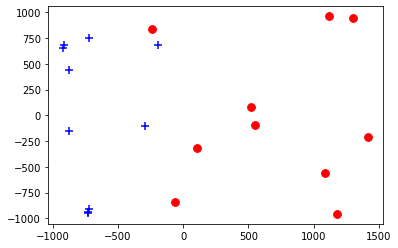

In [215]:
import matplotlib.pyplot as plt

def display(data):
    for i in range(data.shape[0]):
        if i < data.shape[0]/2:
            plt.scatter(data[i,0],data[i,1],c='b',s=60,marker='+')
        else:
            plt.scatter(data[i,0],data[i,1],c='r',s=60,marker='o')
    
projected, U, s = myPCA(imgData, 2)
display(projected)

**Step 5:** To validate the results, you can compare the plot above against the principal components found by scikit-learn. This part has already been done for you. Note the results may appear slightly different because the principal components may differ by just the sign. So, if you perform a reflection on either the x- or y-axis, it should give an identical plot.

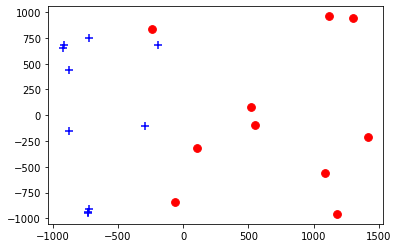

In [216]:
from sklearn.decomposition import PCA

numComponents = 2
pca = PCA(n_components=numComponents)
pca.fit(imgData)
projected = pca.transform(imgData)
display(projected)